In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("StudentsPerformance").getOrCreate()

In [ ]:
df = spark.read.csv("StudentsPerformance.csv", header=True, inferSchema=True)

In [ ]:
df.show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group C|               some college|    standard|              completed|        69|           90|           88|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|           57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     

In [ ]:
df.show(2)

+------+--------------+---------------------------+--------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|   lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+--------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|standard|                   none|        72|           72|           74|
|female|       group C|               some college|standard|              completed|        69|           90|           88|
+------+--------------+---------------------------+--------+-----------------------+----------+-------------+-------------+
only showing top 2 rows



In [ ]:
df.printSchema()

root
 |-- gender: string (nullable = true)
 |-- race/ethnicity: string (nullable = true)
 |-- parental level of education: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- test preparation course: string (nullable = true)
 |-- math score: integer (nullable = true)
 |-- reading score: integer (nullable = true)
 |-- writing score: integer (nullable = true)



In [ ]:
df.describe().toPandas()

,summary,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,count,1000,1000,1000,1000,1000,1000,1000,1000
1,mean,None,None,None,None,None,66.089,69.169,68.054
2,stddev,None,None,None,None,None,15.163080096009454,14.600191937252223,15.19565701086966
3,min,female,group A,associate's degree,free/reduced,completed,0,17,10
4,max,male,group E,some high school,standard,none,100,100,100


In [ ]:
df.groupby('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|female|  518|
|  male|  482|
+------+-----+



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

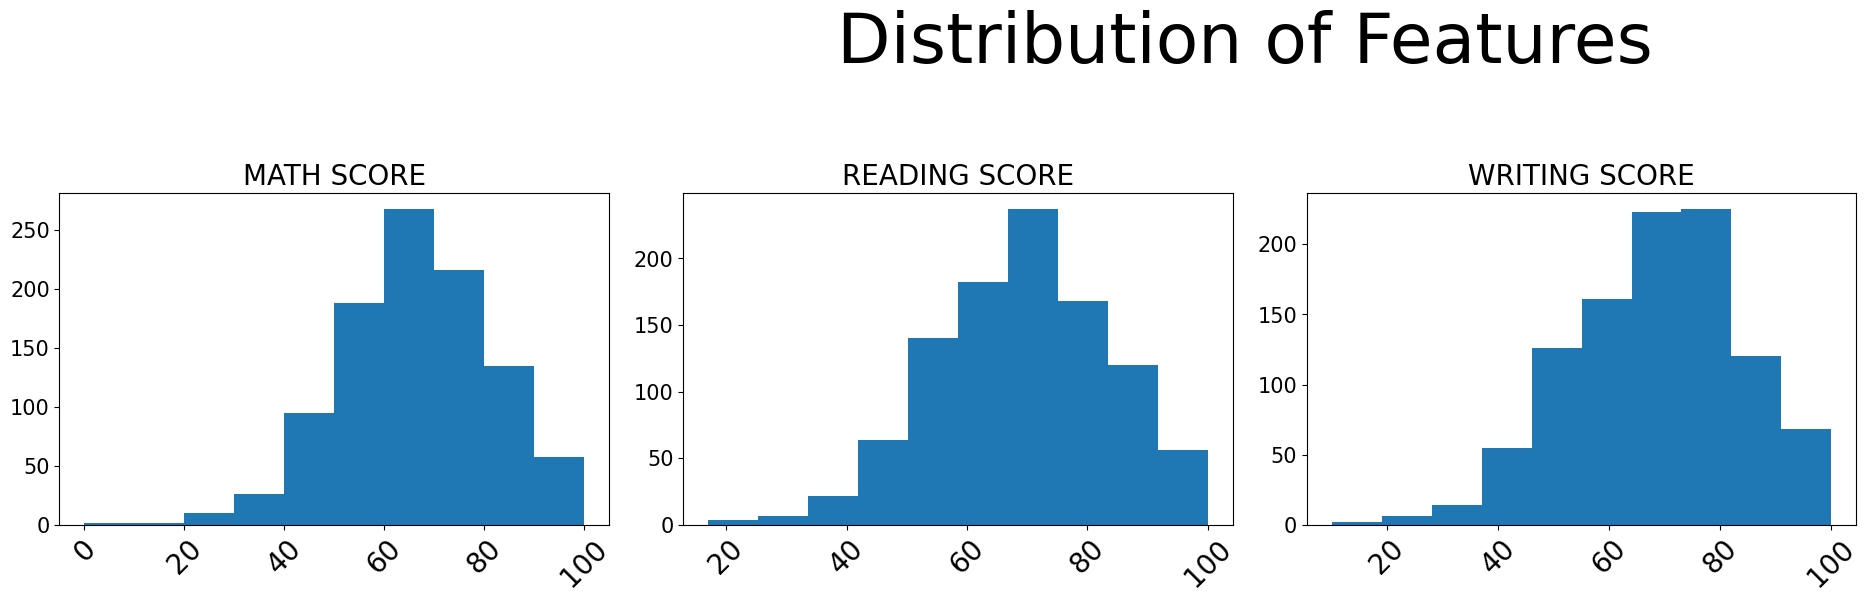

In [ ]:
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")
for col, num in zip(df.toPandas().describe().columns, range(1,11)):
  ax = fig.add_subplot(3,4, num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()